# Atividade 03 - Luiz Felipe Pereira de Brito

## Fazer as seguintes etapas:

1 - Abrir um arquivo de shape das cidades do Brasil

2 - Abrir um arquivo de raster

3 - Recortar os dados do raster utilizando as geometrias do shapefile

4 - Escrever uma nova coluna com base nos dados do raster na mesma variável que você abriu o shapefile

5 - Salvar o arquivo em formato .shp

In [1]:
# Carregar pacotes

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rioxarray as rioxr
from rasterio.mask import mask
from rasterio.features import geometry_mask
from rasterstats import zonal_stats

In [2]:
path = 'C:/ENS410064/dados/brutos/atividade03'

<Axes: >

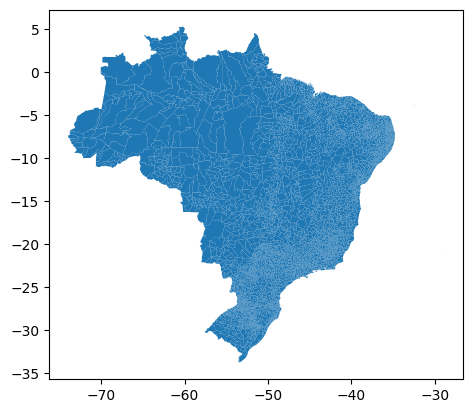

In [4]:
br = gpd.read_file(path+'/'+'BR_Municipios_2022/BR_Municipios_2022.shp')
fig,ax = plt.subplots()
br.plot(ax=ax)

<Axes: >

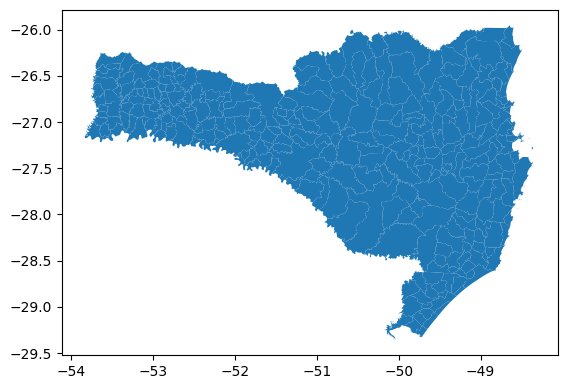

In [5]:
sc = br[br['SIGLA_UF']=='SC']
sc.plot()

<Axes: >

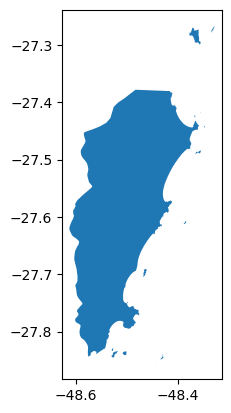

In [6]:
fln = br[br['NM_MUN']=='Florianópolis']
fln.plot()

In [74]:
# Salve o 'fln' como um Shapefile
shapefile_path = path+'/'+'FLN/polygonFLN.shp'
fln.to_file(shapefile_path)

<Axes: >

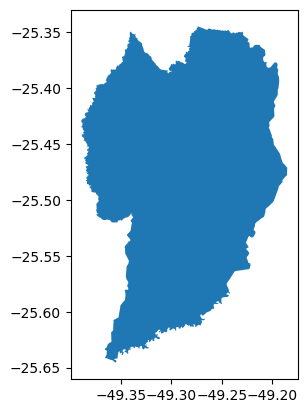

In [7]:
cwb = br[br['NM_MUN']=='Curitiba']
cwb.plot()

In [3]:
dataset = rasterio.open(path+'/'+'LandUse_Sentinel2_2021_2022.tif')

In [4]:
dataRaster = rioxr.open_rasterio(path+'/'+'LandUse_Sentinel2_2021_2022.tif')
dataRaster.shape

(1, 89014, 61044)

In [82]:
#clipped = dataRaster.rio.clip(br[br['NM_MUN']=='Florianópolis'].geometry.buffer(1))

### A seguir é realizado o recorte do raster para o shp da Lagoa do Peri

In [83]:
# Caminho para o shapefile que define a área de interesse
shapefile_path = path +'/'+'Lagoa/BAciaLagoa.shp'

# Caminho para o arquivo de raster
raster_path = path+'/'+'LandUse_Sentinel2_2021_2022.tif'

# Carregue o shapefile
gdf = gpd.read_file(shapefile_path)

# Abra o arquivo de raster
with rasterio.open(raster_path) as src:
    # Realize o recorte do raster usando as geometrias do shapefile
    out_image, out_transform = mask(src, gdf.geometry, crop=True)
    out_meta = src.meta.copy()

# Caminho para salvar o novo arquivo raster recortado
output_path = path+'/'+'raster_recortado_lagoaPeri.tif'

# Salve o novo arquivo raster recortado
with rasterio.open(output_path, 'w', **out_meta) as dest:
    dest.write(out_image)

### Tentativa de abrir o arquivo raster de uso do solo do Sentinel 2, mas o arquivo é muito grande

In [12]:
# Abra o arquivo raster
with rasterio.open(path+'/'+'LandUse_Sentinel2_2021_2022.tif') as src:
    # Leia os dados raster e a transformação espacial
    data = src.read(1)  # Lê a primeira banda do raster
    transform = src.transform

# Visualize os dados raster
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', extent=(transform[2], transform[2] + data.shape[1] * transform[0], transform[5] + data.shape[0] * transform[4], transform[5]))
plt.colorbar(label='Valor do Pixel')
plt.title('Visualização do Raster')
plt.show()

MemoryError: Unable to allocate 5.06 GiB for an array with shape (1, 89014, 61044) and data type uint8

### A seguir, tentei fazer recorte do mapbiomas para Florianópolis, mas gerou um arquivo de 22.9 GiB

In [3]:
# Caminho para o shapefile que define a área de interesse
shapefile_path = path+'/'+'FLN/polygonFLN.shp'

# Caminho para o arquivo de raster
raster_path = path+'/'+'MapBiomas/brasil_coverage_2022.tif'

# Carregue o shapefile
fln = gpd.read_file(shapefile_path)

# Abra o arquivo de raster
with rasterio.open(raster_path) as src:
    # Realize o recorte do raster usando as geometrias do shapefile
    out_image, out_transform = mask(src, fln.geometry, crop=True)
    out_meta = src.meta.copy()

# Caminho para salvar o novo arquivo raster recortado
#output_path = path+'/'+'raster_recortado_FLN.tif'

# Salve o novo arquivo raster recortado
#with rasterio.open(output_path, 'w', **out_meta) as dest:
    #dest.write(out_image)

In [10]:
dataRaster = rioxr.open_rasterio(path+'/'+'MapBiomas/brasil_coverage_2022.tif')
#clipped = dataRaster.rio.clip(br[br['NM_MUN']=='Florianópolis'].geometry.buffer(1))

In [13]:
# Caminho para o shapefile que define a área de interesse
shapefile_path = path+'/'+'FLN/polygonFLN.shp'

# Caminho para o arquivo de raster
raster_path = path+'/'+'LandUse_Sentinel2_2021_2022.tif'

# Carregue o shapefile
fln = gpd.read_file(shapefile_path)

# Abra o arquivo de raster
with rasterio.open(raster_path) as src:
    # Realize o recorte do raster usando as geometrias do shapefile
    out_image, out_transform = mask(src, fln.geometry, crop=True)
    out_meta = src.meta.copy()

# Caminho para salvar o novo arquivo raster recortado
output_path = path+'/'+'raster_recortado_FLN.tif'

# Salve o novo arquivo raster recortado
with rasterio.open(output_path, 'w', **out_meta) as dest:
    dest.write(out_image)

ValueError: Input shapes do not overlap raster.